NOMBRES: Jose Miguel 

APELLIDOS: Gonzalez y Gonzalez

CARNE: 20335

FECHA: 7/18/2024

**Comentario**
En este laboratorio en partícular, para el último problema **es necesario presentar bibliografía si es necesario**.

1. Importe la información contenida en el siguiente enlace: "https://raw.githubusercontent.com/totalgood/nlpia/master/src/nlpia/data/hutto_ICWSM_2014/tweets_GroundTruth.csv" (5pts)

In [59]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

2. Prepare los datos para ser tokenizada y posteriormente entrenada y evaluada. (15pts)

In [60]:
file_path = "./tweets_GroundTruth.csv"
data = pd.read_csv(file_path)

In [61]:
regexp_tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

custom_stopwords = set(stopwords.words('english') + ['word1', 'word2'])

In [62]:
custom_stopwords = set(stopwords.words('english') + ['word1', 'word2'])  # Añade tus propias palabras aquí
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'\@\w+|\#', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = regexp_tokenizer.tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stopwords]
    return tokens

In [63]:
data['tokens'] = data['text'].apply(preprocess_text)

text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(data['tokens'])
sequences = text_tokenizer.texts_to_sequences(data['tokens'])
max_len = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_len, padding='post')

y = np.array(data['sentiment'])
vocab_size = len(text_tokenizer.word_index) + 1

3. Investigue sobre los tipos de tokenizadores que tiene la librería nltk. En un comentario explique brevemente en que se basó para escoger el que consideró correcto. (5pts)

La elección del RegexpTokenizer se basó en la necesidad de tener un mayor control sobre el proceso de tokenización y asegurar que solo se extraigan palabras alfanuméricas, eliminando números y signos de puntuación. Esto es crucial para limpiar los datos de manera efectiva y preparar el texto para el procesamiento posterior, como la lematización y la eliminación de stopwords. La expresión regular r'\w+' se utiliza para definir el patrón de tokenización, asegurando que solo se consideren secuencias de caracteres alfanuméricos como tokens válidos. Esta flexibilidad y control sobre la tokenización hacen que RegexpTokenizer sea una elección adecuada para este proyecto.

4. Cree un modelo para determinar los sentimientos de cada uno de los textos en la base de datos, partiendo de lo obtenido a través de la tokenización. Responda: (15pts)
  1. ¿Qué tipo de problema de Machine Learning es?

In [64]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

loss, mae = model.evaluate(X, y)
print(f'Model Loss: {loss}, Mean Absolute Error: {mae}')

Epoch 1/20
105/105 [==============================] - 11s 59ms/step - loss: 1.7374 - mae: 1.0525 - val_loss: 1.0811 - val_mae: 0.8109
Epoch 2/20
105/105 [==============================] - 5s 48ms/step - loss: 0.6905 - mae: 0.6500 - val_loss: 1.0177 - val_mae: 0.7708
Epoch 3/20
105/105 [==============================] - 5s 46ms/step - loss: 0.4301 - mae: 0.5046 - val_loss: 0.9664 - val_mae: 0.7528
Epoch 4/20
105/105 [==============================] - 5s 44ms/step - loss: 0.3370 - mae: 0.4421 - val_loss: 1.0193 - val_mae: 0.7691
Epoch 5/20
105/105 [==============================] - 5s 44ms/step - loss: 0.2645 - mae: 0.3945 - val_loss: 1.0512 - val_mae: 0.7960
Epoch 6/20
105/105 [==============================] - 5s 45ms/step - loss: 0.2294 - mae: 0.3644 - val_loss: 1.0416 - val_mae: 0.7771
Epoch 7/20
105/105 [==============================] - 5s 45ms/step - loss: 0.2013 - mae: 0.3386 - val_loss: 1.0195 - val_mae: 0.7729
Epoch 8/20
105/105 [==============================] - 5s 50ms/step -

Este problema es un ejemplo de regresión supervisada. Estamos tratando de predecir una variable continua (el sentimiento, que es un valor numérico) basada en un conjunto de características (las palabras del tweet transformadas en características TF-IDF). La tarea implica aprender una función que mapea las características del texto a un valor de sentimiento numérico, utilizando datos etiquetados para entrenar el modelo.

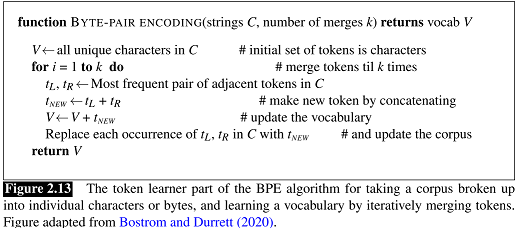

5. En La imagen anterior se muestra el algoritmo BPE visto en clase en seudo-código. El objetivo de este ejercicio es programarlo, desde 0, en Python. En este caso la calidad y limpieza del código si será tomada en cuenta.(60pts)

 Un detalle que no se menciono en clase es que los pares obtenidos pueden ser de la siguiente forma:
"bd" esta en el vocabulario. A través del proceso iterativo se ve que un el par más repetido es "bd" + "c", por lo tanto "bdc" entra al vocabulario. El pareo en BTE es por elementos del vocabulario, no por caracteres. Cometí el error de no hacer enfásis en eso durante la clase.

Este problema se encuentra fácilmente en internet. Pero los insto a retarse un poco a la hora de intentar resolverlo. Se presentarán situaciones donde la biblografía puede ser escasa, así que poder leer un algoritmo y programarlo es una habilidad importante.

In [65]:
def get_vocab(corpus):
    """ Obtains the vocabulary from the corpus. """
    vocab = {}
    for word in corpus:
        for char in word:
            if char in vocab:
                vocab[char] += 1
            else:
                vocab[char] = 1
    return vocab

In [66]:
def get_stats(corpus):
    """ Returns a dictionary of pairs of characters and their frequencies in the corpus. """
    pairs = {}
    for word in corpus:
        symbols = word.split()
        for i in range(len(symbols)-1):
            pair = (symbols[i], symbols[i+1])
            if pair in pairs:
                pairs[pair] += 1
            else:
                pairs[pair] = 1
    return pairs

In [67]:

def merge_vocab(pair, v_in):
    """ Merges all occurrences of the most frequent pair into a new symbol. """
    v_out = {}
    bigram = ' '.join(pair)
    replacement = ''.join(pair)
    for word in v_in:
        new_word = word.replace(bigram, replacement)
        v_out[new_word] = v_in[word]
    return v_out

In [68]:
def byte_pair_encoding(corpus, num_merges):
    """ Performs byte pair encoding on the given corpus for a specified number of merges. """
    vocab = {word: corpus.count(word) for word in corpus}
    
    for i in range(num_merges):
        pairs = get_stats(vocab)
        if not pairs:
            break
        best = max(pairs, key=pairs.get)
        vocab = merge_vocab(best, vocab)
    
    return vocab

In [69]:
# Convert text to a corpus suitable for BPE
text = """Imagina que intentas enseñar a leer a un niño. En lugar de introducirles directamente en párrafos complejos, empezaría introduciéndoles letras sueltas, luego sílabas y, por último, palabras enteras. De forma similar, la tokenización descompone grandes extensiones de texto en unidades más digeribles y comprensibles para las máquinas. El objetivo principal de la tokenización es representar el texto de forma que tenga sentido para las máquinas sin perder su contexto. Al convertir el texto en tokens, los algoritmos pueden identificar patrones más fácilmente. Este reconocimiento de patrones es crucial porque hace posible que las máquinas entiendan y respondan a la información humana. Por ejemplo, cuando una máquina encuentra la palabra correr, no la ve como una entidad singular, sino como una combinación de tokens que puede analizar y de la que puede extraer un significado."""

corpus = text.split()
num_merges = 10
encoded_vocab = byte_pair_encoding(corpus, num_merges)

for word, freq in encoded_vocab.items():
    print(f'{word}: {freq}')

Imagina: 1
que: 5
intentas: 1
enseñar: 1
a: 3
leer: 1
un: 2
niño.: 1
En: 1
lugar: 1
de: 7
introducirles: 1
directamente: 1
en: 3
párrafos: 1
complejos,: 1
empezaría: 1
introduciéndoles: 1
letras: 1
sueltas,: 1
luego: 1
sílabas: 1
y,: 1
por: 1
último,: 1
palabras: 1
enteras.: 1
De: 1
forma: 2
similar,: 1
la: 6
tokenización: 2
descompone: 1
grandes: 1
extensiones: 1
texto: 3
unidades: 1
más: 2
digeribles: 1
y: 3
comprensibles: 1
para: 2
las: 3
máquinas.: 1
El: 1
objetivo: 1
principal: 1
es: 2
representar: 1
el: 2
tenga: 1
sentido: 1
máquinas: 2
sin: 1
perder: 1
su: 1
contexto.: 1
Al: 1
convertir: 1
tokens,: 1
los: 1
algoritmos: 1
pueden: 1
identificar: 1
patrones: 2
fácilmente.: 1
Este: 1
reconocimiento: 1
crucial: 1
porque: 1
hace: 1
posible: 1
entiendan: 1
respondan: 1
información: 1
humana.: 1
Por: 1
ejemplo,: 1
cuando: 1
una: 3
máquina: 1
encuentra: 1
palabra: 1
correr,: 1
no: 1
ve: 1
como: 2
entidad: 1
singular,: 1
sino: 1
combinación: 1
tokens: 1
puede: 2
analizar: 1
extraer: 1
sig